# Comparing EM with GD for Gaussian mixtures (initialized from a one-cluster point)

In [111]:
## choosing parameters for mixture of gaussians
import numpy as np
m = n = 2
gPi = np.random.rand(m)
gPi = gPi / np.sum(gPi)
gMu = np.random.rand(m, n) * 2
gMu[1] = -gMu[0]

In [113]:
# choosing the number of samples
samples = 10000
data = np.zeros((samples, 2))
# sampling from the generating distribution
for _ in range(samples):
    t = np.random.rand()
    if t < gPi[0]:
        data[_] = np.random.multivariate_normal(gMu[0], np.eye(n), 1)
    else:
        data[_] = np.random.multivariate_normal(gMu[1], np.eye(n), 1)

In [114]:
# def a multivariate gaussian with identity covariance
def gaussian(x, y, n):
    result = 1.0
    for _ in range(n):
        result *= np.exp(-(x[_] - y[_])**2/2.0)
    return result

In [116]:
# def a mixture of Gaussians
def gmm(pi, Mu, x, m, n):
    result = 0.0
    for _ in range(m):
       result += pi[_] * gaussian(x, Mu[_], n)  
    return result

In [151]:
# initial parameters
iPi = np.array([0.0001, 0.9999])
iMu = (np.random.rand(m, n) * 2 - 1)
# running parameters
Pi = np.copy(iPi)
Mu = np.copy(iMu)

## EM algorithm

In [152]:
# number of iterations
iteration = 100 
loss = np.zeros(iteration)
pis = np.zeros(iteration)
# Zc is the partition function vector
for itts in range(iteration):
    # compute Z_c and E_{q_c}[x]
    Zc = np.zeros(m)
    Zcx = np.zeros((m, n))
    for c in range(m):
        for i in range(samples):
            x = data[i]
            Zcx[c] += np.multiply(x, (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n)))
            Zc[c] += (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n))
    Zc /= samples
    Zcx /= samples
    # update parameters
    print("Zc: ", Zc, "Pi: ", Pi)
    for _ in range(m):
        Pi[_] *= Zc[_]
        Mu[_] = Zcx[_] / Zc[_]
    pis[itts] = Pi[0]
    cross_entropy = 0.0
    for i in range(samples):
        x = data[i]
        cross_entropy += -np.log(gmm(Pi, Mu, x, m, n))
    cross_entropy /= samples
    loss[itts] = cross_entropy

Zc:  [3.827  0.9997] Pi:  [0.0001 0.9999]
Zc:  [1.4219 0.9998] Pi:  [0.0004 0.9996]
Zc:  [1.8139 0.9996] Pi:  [0.0005 0.9995]
Zc:  [2.2262 0.9988] Pi:  [0.001 0.999]
Zc:  [2.1513 0.9975] Pi:  [0.0022 0.9978]
Zc:  [1.8178 0.9961] Pi:  [0.0047 0.9953]
Zc:  [1.5963 0.9948] Pi:  [0.0086 0.9914]
Zc:  [1.4608 0.9936] Pi:  [0.0137 0.9863]
Zc:  [1.3702 0.9924] Pi:  [0.02 0.98]
Zc:  [1.306  0.9914] Pi:  [0.0275 0.9725]
Zc:  [1.2584 0.9904] Pi:  [0.0359 0.9641]
Zc:  [1.2219 0.9895] Pi:  [0.0451 0.9549]
Zc:  [1.1931 0.9887] Pi:  [0.0551 0.9449]
Zc:  [1.1698 0.988 ] Pi:  [0.0658 0.9342]
Zc:  [1.1506 0.9874] Pi:  [0.077 0.923]
Zc:  [1.1345 0.9869] Pi:  [0.0885 0.9115]
Zc:  [1.1209 0.9865] Pi:  [0.1004 0.8996]
Zc:  [1.1093 0.9861] Pi:  [0.1126 0.8874]
Zc:  [1.0992 0.9858] Pi:  [0.1249 0.8751]
Zc:  [1.0905 0.9856] Pi:  [0.1373 0.8627]
Zc:  [1.0828 0.9854] Pi:  [0.1497 0.8503]
Zc:  [1.076  0.9853] Pi:  [0.1621 0.8379]
Zc:  [1.07   0.9852] Pi:  [0.1744 0.8256]
Zc:  [1.0647 0.9852] Pi:  [0.1866 0.8134]


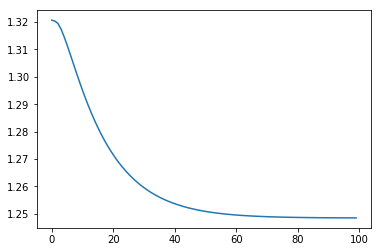

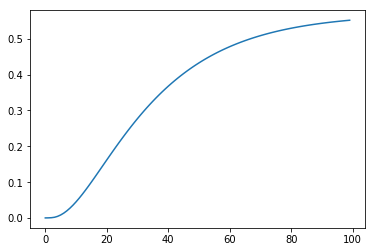

In [153]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.show()
plt.plot(pis)
plt.show()## EM algorithm

## GD algorithm

In [122]:
avg = np.mean(data, axis = 0)

In [164]:
# go back to the same initialization
Pi = np.copy(iPi)
Mu = np.copy(iMu)
Mu[1] = avg
# set the step size
ss = 0.05
# number of iterations
iteration = 100
loss_gd = np.zeros(iteration)
pis_gd = np.zeros(iteration)
# Zc is the partition function vector
for itts in range(iteration):
    # compute Z_c and E_{q_c}[x]
    # the computations for Zc, Zcx are the same
    oldPi = np.copy(Pi)
    oldMu = np.copy(Mu)
    Zc = np.zeros(m)
    Zcx = np.zeros((m, n))
    for c in range(m):
        for i in range(samples):
            x = data[i]
            Zcx[c] += np.multiply(x, (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n)))
            Zc[c] += (gaussian(x, Mu[c], n) / gmm(Pi, Mu, x, m, n))
    Zc /= samples
    Zcx /= samples
    # the only difference is in updating parameters
    for _ in range(m):
        Pi[_] += ss * Zc[_]
        Mu[_] += ss * oldPi[_] * ( (Zcx[_] / Zc[_]) - oldMu[_]) * Zc[_]
    # do the projection, no need to project Mu now
    Pi = nbm.project(Pi)
    # print (use it for debugging)
    print("Zc: ", Zc, "Pi: ", Pi)
    pis_gd[itts] = Pi[0]
    cross_entropy = 0.0
    for i in range(samples):
        x = data[i]
        cross_entropy += -np.log(gmm(Pi, Mu, x, m, n))
    cross_entropy /= samples
    loss_gd[itts] = cross_entropy

Zc:  [1.0065 1.    ] Pi:  [0.0003 0.9997]
Zc:  [1.0064 1.    ] Pi:  [0.0004 0.9996]
Zc:  [1.0064 1.    ] Pi:  [0.0006 0.9994]
Zc:  [1.0063 1.    ] Pi:  [0.0007 0.9993]
Zc:  [1.0063 1.    ] Pi:  [0.0009 0.9991]
Zc:  [1.0062 1.    ] Pi:  [0.0011 0.9989]
Zc:  [1.0062 1.    ] Pi:  [0.0012 0.9988]
Zc:  [1.0061 1.    ] Pi:  [0.0014 0.9986]
Zc:  [1.0061 1.    ] Pi:  [0.0015 0.9985]
Zc:  [1.006 1.   ] Pi:  [0.0017 0.9983]
Zc:  [1.006 1.   ] Pi:  [0.0018 0.9982]
Zc:  [1.006 1.   ] Pi:  [0.002 0.998]
Zc:  [1.0059 1.    ] Pi:  [0.0021 0.9979]
Zc:  [1.0059 1.    ] Pi:  [0.0023 0.9977]
Zc:  [1.0059 1.    ] Pi:  [0.0024 0.9976]
Zc:  [1.0058 1.    ] Pi:  [0.0026 0.9974]
Zc:  [1.0058 1.    ] Pi:  [0.0027 0.9973]
Zc:  [1.0058 1.    ] Pi:  [0.0028 0.9972]
Zc:  [1.0057 1.    ] Pi:  [0.003 0.997]
Zc:  [1.0057 1.    ] Pi:  [0.0031 0.9969]
Zc:  [1.0057 1.    ] Pi:  [0.0033 0.9967]
Zc:  [1.0057 1.    ] Pi:  [0.0034 0.9966]
Zc:  [1.0057 1.    ] Pi:  [0.0036 0.9964]
Zc:  [1.0056 1.    ] Pi:  [0.0037 0.9963]
Zc

## Comparing the escape rate for EM and GD

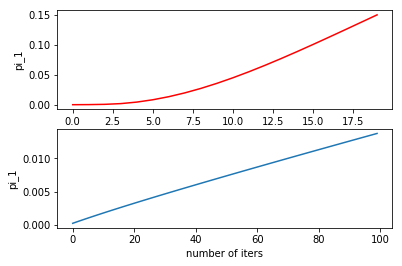

In [178]:
plt.subplot(211)
plt.xlabel("number of iters")
plt.ylabel("pi_1")
plt.plot(pis[:20], 'r')
plt.subplot(212)
plt.plot(pis_gd)
plt.xlabel("number of iters")
plt.ylabel("pi_1")
plt.show()## EM algorithm

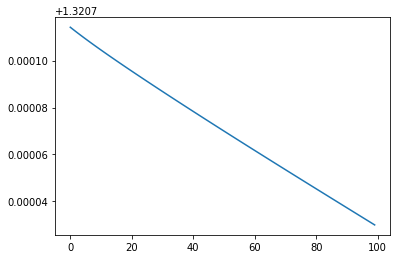

In [179]:
plt.plot(loss_gd)